In [1]:
import ROOT
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy import stats

Welcome to JupyROOT 6.26/04


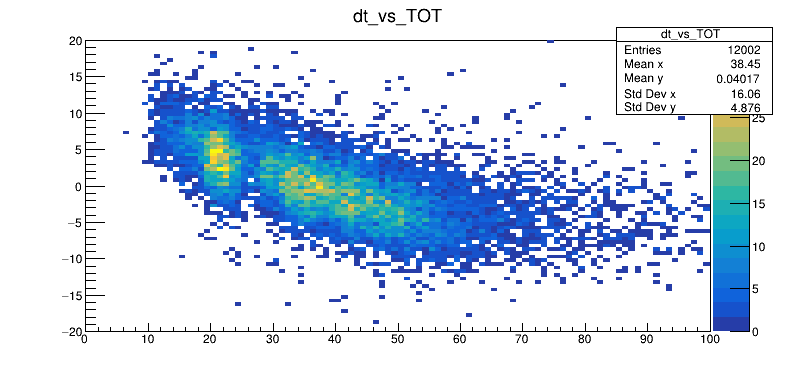

In [2]:
ifile=ROOT.TFile("histMuonAnalysis_Run221.root","read")

h1a=ifile.Get("dt_vs_TOT")

c3 = ROOT.TCanvas("c3","TOA-TOT",800,400)
c3.Divide(1,1)
c3.cd(1)
h1a.Draw("COLZ")
c3.Draw()

In [3]:
nx=h1a.GetNbinsX()
ny=h1a.GetNbinsY()
n=0
m=1000000
xvals=np.zeros(m)
yvals=np.zeros(m)
zvals=np.zeros(m)
for ixx in np.arange(1,nx,1):
    for iyy in np.arange(1,ny,1):
        ix=int(ixx)
        iy=int(iyy)
        h1a.GetBinContent(ix,iy)
        x=h1a.GetXaxis().GetBinCenter(ix)
        y=h1a.GetYaxis().GetBinCenter(iy)
        z=h1a.GetBinContent(ix,iy)
        # print(ix,iy,x,y,z)
        if x>60.0:
            continue
        if z>0.0:
            for k in np.arange(z):
                xvals[n]=x
                yvals[n]=y
                zvals[n]=z
                n=n+1
        
xvals=xvals[:n]
yvals=yvals[:n]

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
        
print(slope, intercept, rvalue, pvalue, stderr)

-0.26000377924037466 9.800929923918385 -0.6668193603886943 0.0 0.0028051477822949177
